In [1]:
import numpy as np
import scipy as sp
from scipy import signal
from matplotlib import pyplot as plt
from scipy.fft import fft
import scipy.io as spio

# Projeto 3 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Gustavo Almeida Valentim
## Matrícula: 20/2014468

# Questão 1

Considere um sinal $x\left(t\right) = 8 \cdot \text{ret}\left(t\right)$, onde:

$$ \begin{align}
	\text{ret}\left(x\right) = \begin{cases}
                               0 & \text{se} ~~ \left|x\right| > \frac{1}{2} \\
															 \frac{1}{2} & \text{se} ~~ \left|x\right| = \frac{1}{2} \\
															 1 & \text{se} ~~ \left|x\right| < \frac{1}{2} \\
                             \end{cases}
\end{align}                             
$$

Considere que o sinal será amostrado a uma taxa $T = \frac{1}{8}$ s, e que queremos uma resolução na frequência de $f_0 = \frac{1}{4}$ Hz. 



## Questão 1a (1.0 ponto)

Obtenha o sinal $x\left[n\right]$, como uma amostragem de $x\left(t\right)$ .

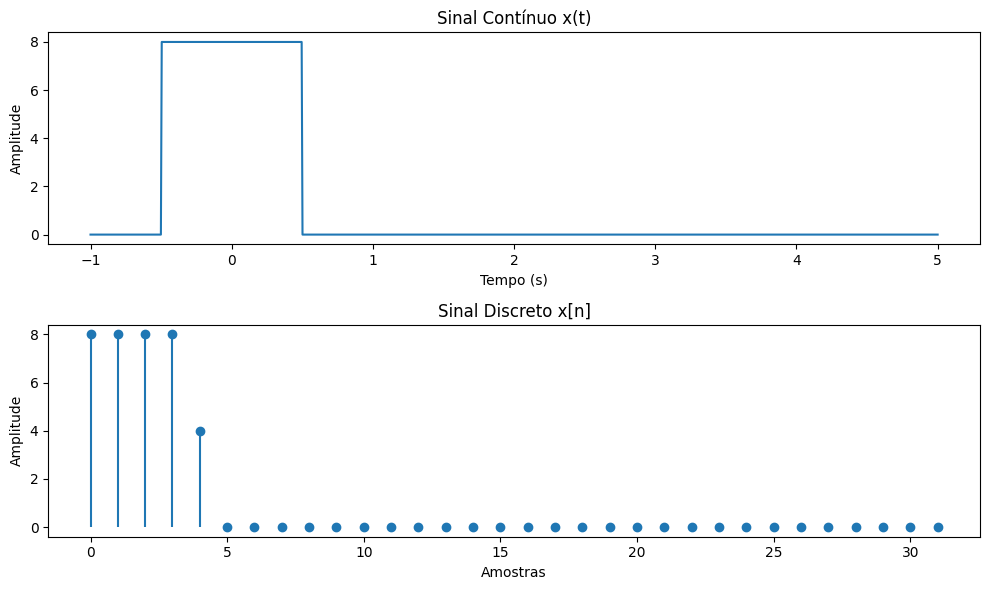

In [2]:
# Função ret
def ret(x):
    return np.where(np.abs(x) > 0.5, 0, np.where(np.abs(x) == 0.5, 0.5, 1))

# Parâmetros do sinal
T = 1 / 8  # Período de amostragem (s)
f0 = 1 / 4  # Resolução na frequência (Hz)
N = int(1 / (f0 * T))  # Número de amostras

# Vetor de tempo contínuo
t_cont = np.linspace(-1, 5, 1000)

# Sinal contínuo
x_cont = 8 * ret(t_cont)

# Vetor de tempo discreto
n = np.arange(N)

# Tempos de amostragem
t = n * T

# Amostragem do sinal contínuo
x = 8 * ret(t)

# Visualização do sinal contínuo e discreto
plt.figure(figsize=(10, 6))

# Sinal contínuo
plt.subplot(2, 1, 1)
plt.plot(t_cont, x_cont)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal Contínuo x(t)')

# Sinal discreto
plt.subplot(2, 1, 2)
plt.stem(n, x, basefmt=' ')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Sinal Discreto x[n]')

plt.tight_layout()
plt.show()


## Questão 1b (1.0 ponto)

Compare a transformada de Fourier real do sinal $x\left(t\right)$ com a Transformada Discreta de Fourier obtida a partir de $x\left[n\right]$ . 

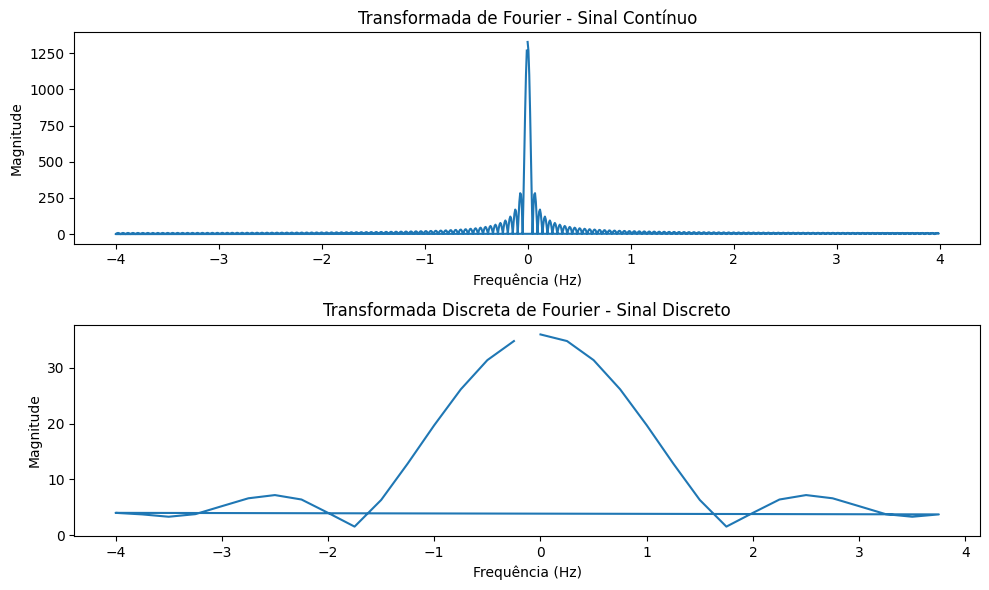

In [3]:
#Resposta da questão 1b
# Função ret
def ret(x):
    return np.where(np.abs(x) > 0.5, 0, np.where(np.abs(x) == 0.5, 0.5, 1))

# Parâmetros do sinal
T = 1 / 8  # Período de amostragem (s)
f0 = 1 / 4  # Resolução na frequência (Hz)
N = int(1 / (f0 * T))  # Número de amostras

# Vetor de tempo contínuo
t_cont = np.linspace(-1, 5, 1000)

# Sinal contínuo
x_cont = 8 * ret(t_cont)

# Vetor de tempo discreto
n = np.arange(N)

# Tempos de amostragem
t = n * T

# Amostragem do sinal contínuo
x = 8 * ret(t)

# Cálculo da Transformada de Fourier do sinal contínuo
f_cont = np.fft.fftfreq(len(t_cont), d=T)
X_cont = np.fft.fft(x_cont)

# Cálculo da Transformada Discreta de Fourier do sinal discreto
f_dft = np.fft.fftfreq(N, d=T)
X_dft = np.fft.fft(x)

# Visualização das transformadas
plt.figure(figsize=(10, 6))

# Transformada de Fourier do sinal contínuo
plt.subplot(2, 1, 1)
plt.plot(f_cont, np.abs(X_cont))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Transformada de Fourier - Sinal Contínuo')

# Transformada Discreta de Fourier do sinal discreto
plt.subplot(2, 1, 2)
plt.plot(f_dft, np.abs(X_dft))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Transformada Discreta de Fourier - Sinal Discreto')

plt.tight_layout()
plt.show()

# Questão 2

Considere um sinal $x\left[n\right]$ com $N = 256$ amostras, onde: 
$$
\begin{align}
	x\left[n\right] = \begin{cases}
                               1 & \text{se} ~~ n < 64 \\
															 0 & \text{se} ~~ n \geq 64 \\															 
                             \end{cases}
\end{align}
$$

Considere agora um filtro passa-baixas ideal $H_1$ com frequência de corte normalizada igual a $\frac{1}{16}$.

## Questão 2a (1.0  ponto)

Filtre o sinal $x\left[n\right]$ com o filtro $H_1$, obtendo o sinal $y\left[n\right]$. Compare o sinal original $x\left[n\right]$ com o sinal obtido $y\left[n\right]$. 

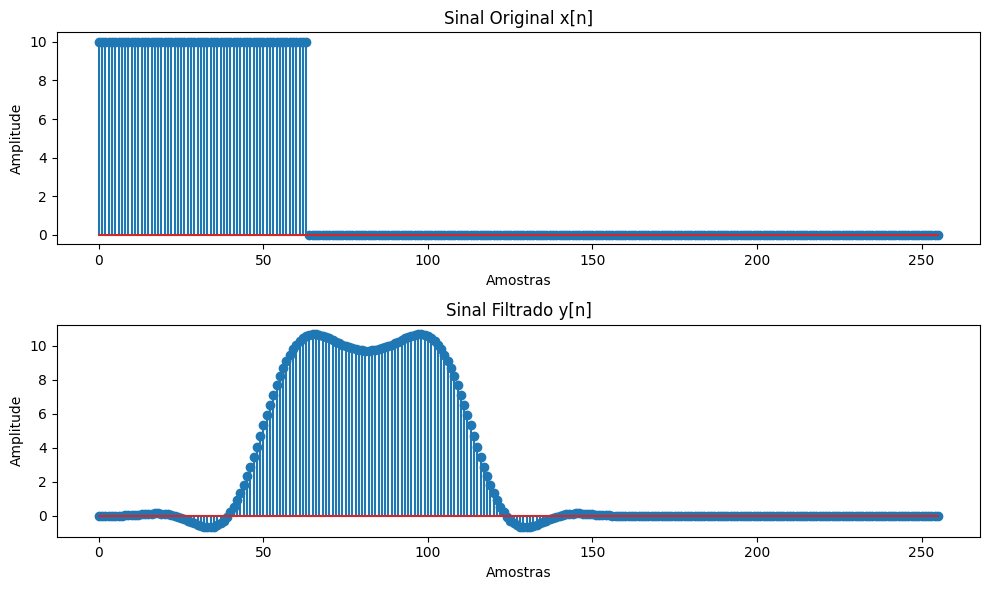

In [4]:
N = 256  # Número de amostras

# Sinal x[n]
x = np.zeros(N)
x[:64] = 10

# Frequência de corte normalizada
fc = 1/16

# Número de coeficientes do filtro
num_taps = 101

# Coeficientes do filtro passa-baixas ideal
h1 = signal.firwin(num_taps, fc)

# Filtragem do sinal x[n] com o filtro H1
y = signal.lfilter(h1, 1, x)

# Plot dos sinais x[n] e y[n]
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.stem(x)
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Sinal Original x[n]')

plt.subplot(2, 1, 2)
plt.stem(y)
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Sinal Filtrado y[n]')

plt.tight_layout()
plt.show()


## Questão 2b (1.0 ponto)

Compare o espectro do sinal $x\left[n\right]$ com o espectro do sinal $y\left[n\right]$. 

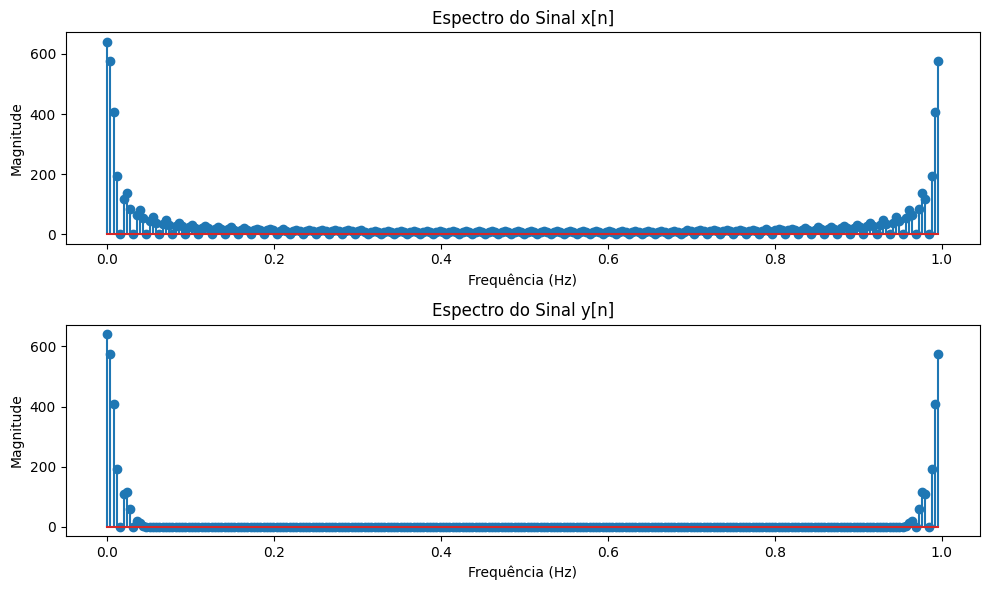

In [5]:
N = 256  # Número de amostras

# Sinal x[n]
x = np.zeros(N)
x[:64] = 10

# Frequência de corte normalizada
fc = 1/16

# Número de coeficientes do filtro
num_taps = 101

# Coeficientes do filtro passa-baixas ideal
h1 = signal.firwin(num_taps, fc)

# Filtragem do sinal x[n] com o filtro H1
y = signal.lfilter(h1, 1, x)

# Cálculo da DFT dos sinais x[n] e y[n]
X = fft(x)
Y = fft(y)

# Frequências
freq = np.arange(N) * (1/N)

# Plot dos espectros dos sinais
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.stem(freq, np.abs(X))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Espectro do Sinal x[n]')

plt.subplot(2, 1, 2)
plt.stem(freq, np.abs(Y))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Espectro do Sinal y[n]')

plt.tight_layout()
plt.show()


## Questão 2c (1.0  ponto)

Aplique o filtro $H_1$ no sinal contido no arquivo "noisy_ecg2.mat". Plote o sinal original e o sinal filtrado, bem como seus espectros.


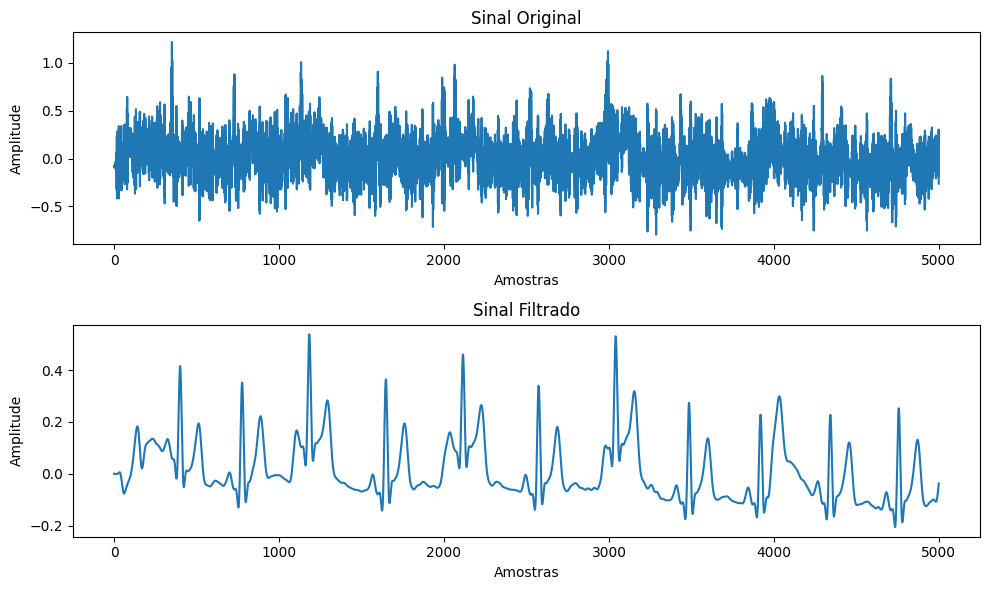

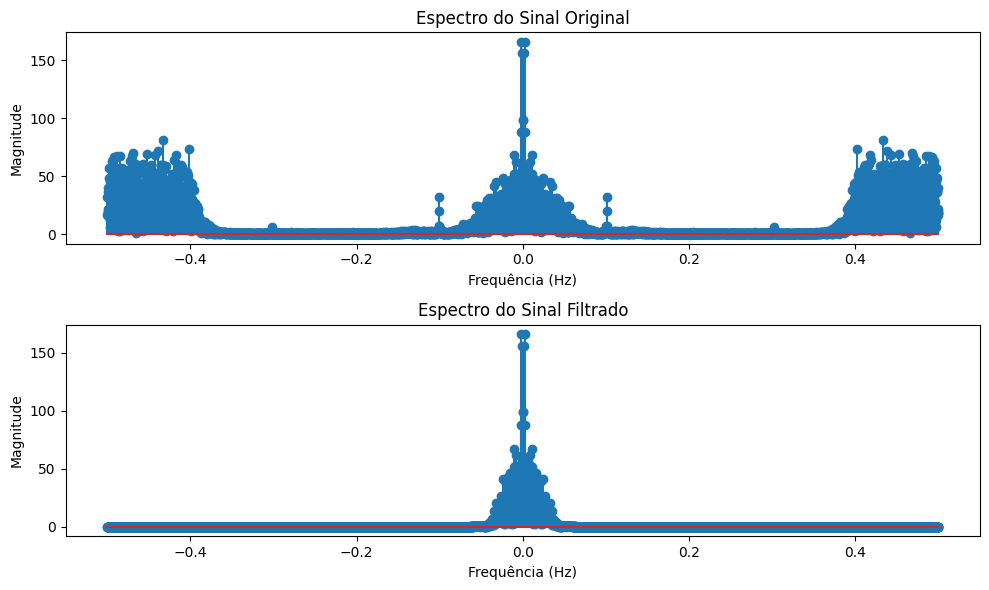

In [6]:
data = spio.loadmat('noisy_ecg_data_2.mat')
sinal = data['noisy_ecg2'].ravel()

fc = 1/16  # Frequência de corte normalizada
num_taps = 101  # Número de coeficientes do filtro
h1 = signal.firwin(num_taps, fc)
sinal_filtrado = signal.lfilter(h1, 1, sinal)
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(sinal)
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Sinal Original')

plt.subplot(2, 1, 2)
plt.plot(sinal_filtrado)
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Sinal Filtrado')

plt.tight_layout()
plt.show()

# Cálculo da DFT dos sinais
sinal_fft = fft(sinal)
sinal_filtrado_fft = fft(sinal_filtrado)

# Frequências
freq = np.fft.fftfreq(len(sinal))

# Plot dos espectros dos sinais
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.stem(freq, np.abs(sinal_fft))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Espectro do Sinal Original')

plt.subplot(2, 1, 2)
plt.stem(freq, np.abs(sinal_filtrado_fft))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Espectro do Sinal Filtrado')

plt.tight_layout()
plt.show()


#sinal = sp.io.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()

# Questão 3 (5.0 pontos)

O teclado de um touch-fone usa sinais de diferentes frequências para especificar quais botões foram pressionados. O teclado tem 12 botões, em um arranjo de quatro linhas e três colunas. Quando um botão é pressionado um sinal é gerado pela soma de dois tons senoidais com frequências diferentes. A frequência mais alta indica a coluna da tecla pressionada, enquanto a menor frequência indica a linha da tecla pressionada. As frequências são geradas de acordo com a tabela:

| | | Coluna | |
| :-: | :-: | :-: | :-: |
| Linha | 1209 Hz | 1336 Hz | 1477 Hz |
| 697 Hz | 1 | 2 | 3 |
| 770 Hz | 4 | 5 | 6 |
| 852 Hz | 7 | 8 | 9 |
| 940 Hz | | 0 | |

A frequência de amostragem é de 8192 Hz, e o som de cada tecla dura um segundo. Escreva um programa que decodifique, de forma automática, um sinal composto por um número de telefone gerado com essas características. Teste o seu programa com os sinais encontrados no arquivo "touch_fone.mat".


In [7]:
# Carregar os sinais do arquivo "touch_fone.mat"
sinal1 = spio.loadmat('touch_fone.mat')['x'].ravel()
sinal2 = spio.loadmat('touch_fone.mat')['y'].ravel()
sinal3 = spio.loadmat('touch_fone.mat')['z'].ravel()

# Parâmetros dos sinais
fs = 8192  # Frequência de amostragem (Hz)
duracao = 1  # Duração de cada tecla (segundos)

# Frequências das linhas e colunas do teclado
frequencias_linhas = [697, 770, 852, 940]  # Frequências das linhas (Hz)
frequencias_colunas = [1209, 1336, 1477]  # Frequências das colunas (Hz)

# Mapeamento das teclas para os dígitos numéricos
teclas = [['1', '2', '3'],
          ['4', '5', '6'],
          ['7', '8', '9'],
          ['', '0', '']]

def decod_tecla(sinal):
    # Cálculo do número de amostras de uma tecla
    num_amostras_tecla = int(fs * duracao)

    # Cálculo do vetor de frequências
    freq = np.fft.fftfreq(num_amostras_tecla, d=1/fs)

    # Aplicar a Transformada Discreta de Fourier (DFT)
    dft = np.fft.fft(sinal)

    # Encontrar os picos nas amplitudes da DFT
    picos, _ = signal.find_peaks(np.abs(dft), height=200)

    # Verificar se picos foram encontrados
    if len(picos) == 0:
        # Atribuir frequências padrão
        freq_linha = 0
        freq_coluna = 0
    else:
        # Encontrar as frequências correspondentes aos picos
        frequencias_picos = np.abs(freq[picos])

        # Identificar a frequência da linha e da coluna
        freq_linha = min(frequencias_picos)
        freq_coluna = max(frequencias_picos)

    # Encontrar a tecla correspondente às frequências
    linha = np.argmin(np.abs(frequencias_linhas - freq_linha))
    coluna = np.argmin(np.abs(frequencias_colunas - freq_coluna))

    return teclas[linha][coluna]

# Decodificar os sinais para obter os números de telefone
telefone1 = ''
num_amostras_tecla = int(fs * duracao)
for i in range(0, len(sinal1), num_amostras_tecla):
    tecla = decod_tecla(sinal1[i:i+num_amostras_tecla])
    telefone1 += tecla

telefone2 = ''
for i in range(0, len(sinal2), num_amostras_tecla):
    tecla = decod_tecla(sinal2[i:i+num_amostras_tecla])
    telefone2 += tecla

telefone3 = ''
for i in range(0, len(sinal3), num_amostras_tecla):
    tecla = decod_tecla(sinal3[i:i+num_amostras_tecla])
    telefone3 += tecla

# Imprimir os números de telefone decodificados
print('Telefone 1:', telefone1)
print('Telefone 2:', telefone2)
print('Telefone 3:', telefone3)

Telefone 1: 31075580
Telefone 2: 911
Telefone 3: 2446712
